In [10]:
# Install dependencies as needed:
#pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "final_data.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "kevinpickelman/nba-data-2012-2024",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'nba-data-2012-2024' dataset.
First 5 records:     GAME_ID     TEAM_ID  TEAM_NAME TEAM_ABBREVIATION    TEAM_CITY  HOME_TEAM  \
0  21200001  1610612764    Wizards               WAS   Washington  Cavaliers   
1  21200001  1610612739  Cavaliers               CLE    Cleveland  Cavaliers   
2  21200002  1610612748       Heat               MIA        Miami       Heat   
3  21200002  1610612738    Celtics               BOS       Boston       Heat   
4  21200003  1610612747     Lakers               LAL  Los Angeles     Lakers   

      MIN  FGM  FGA  FG_PCT  ...  TO  PF  PTS  PLUS_MINUS  EFG_PCT    PIE  \
0  240:00   32   90   0.356  ...  12  19   84         -10     0.32  42.60   
1  240:00   36   79   0.456  ...  20  21   94          10     0.36  57.40   
2  240:00   43   79   0.544  ...   8  20  120          13     0.43  55.74   
3  240:00   39   75   0.520  ...  15  23  107         -13     0.39  44.26   
4  240:00   38   77   0.494  ...  14  21   9

### Logistic Regression: Receiver Operating Characteristic (ROC) Curve

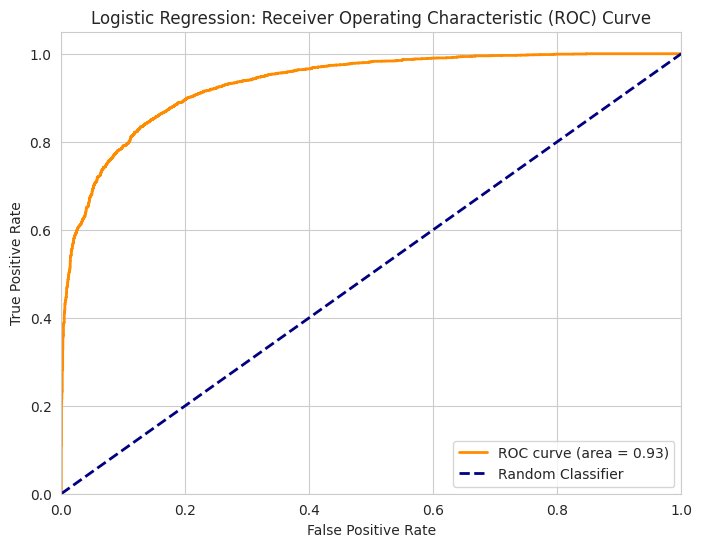

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_pred_proba_log = logistic_model.predict_proba(X_test_log)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_proba_log)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Linear Regression: Actual vs. Predicted Points

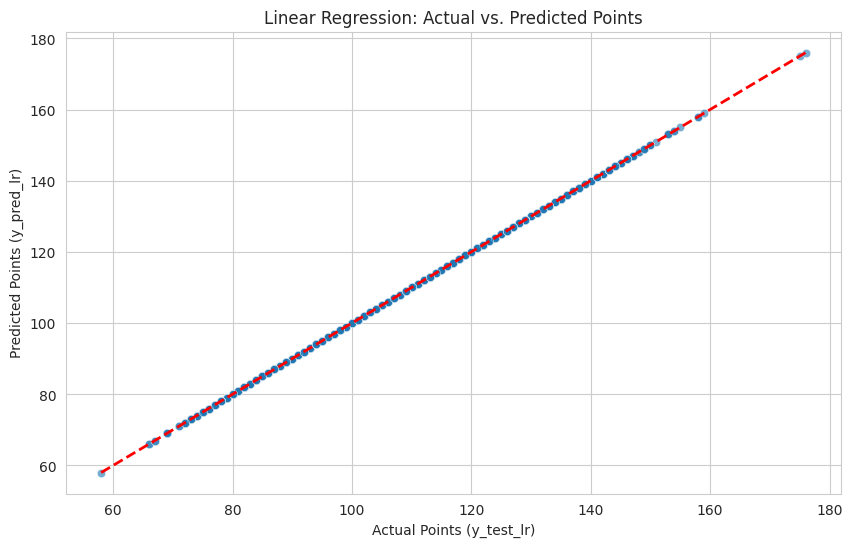

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lr, y=y_pred_lr, alpha=0.6)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted Points')
plt.xlabel('Actual Points (y_test_lr)')
plt.ylabel('Predicted Points (y_pred_lr)')
plt.grid(True)
plt.show()

### Logistic Regression: Confusion Matrix

<Figure size 800x600 with 0 Axes>

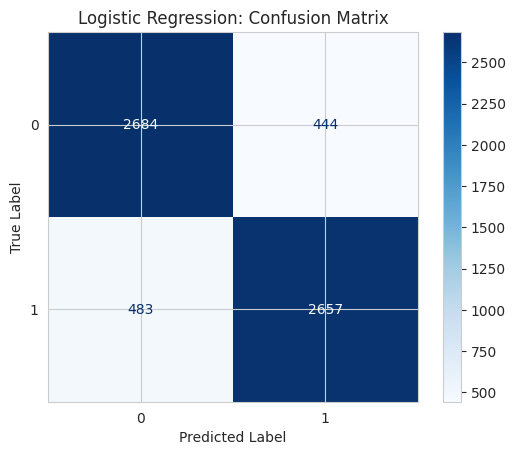

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_log, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic Regression: Precision-Recall Curve

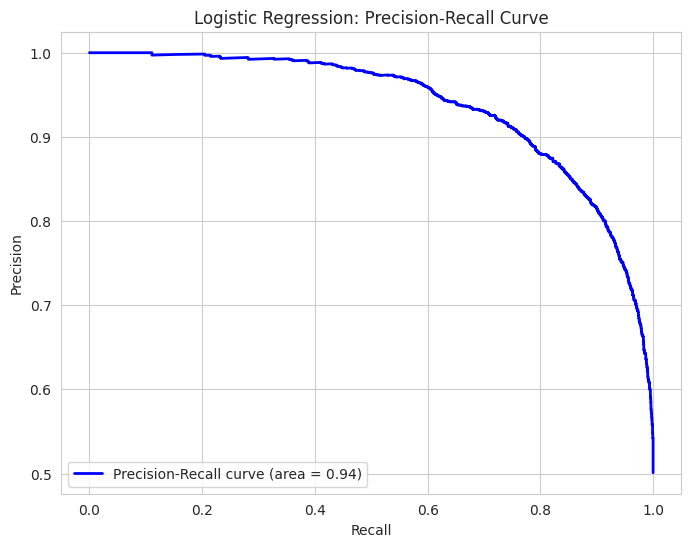

In [18]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_pred_proba_log = logistic_model.predict_proba(X_test_log)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_log, y_pred_proba_log)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression: Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Linear Regression

Linear regression is a statistical model that estimates the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. It's used for predicting a continuous outcome.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# For Linear Regression, let's predict 'PTS' (points scored) using some numerical stats
# We'll use columns that are typically inputs to game performance and are numerical.
# Let's filter out non-numeric and potentially target-related columns from features.

# Identify numerical columns for potential features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Define target variable for Linear Regression
linear_target = 'PTS'

# Define features for Linear Regression. Exclude target and other non-feature columns.
# Also exclude TEAM_ID, GAME_ID, HOME_TEAM (categorical representation of home team),
# COVID_FLAG, RESULT, SEASON (could be treated as categorical or temporal, simplifying for now)

linear_features = [col for col in numeric_cols if col not in ['GAME_ID', 'TEAM_ID', 'PTS', 'RESULT', 'COVID_FLAG', 'SEASON', 'WIN_PCT', 'PLUS_MINUS', 'PIE']]

X_lr = df[linear_features]
y_lr = df[linear_target]

# Drop rows with NaN values in selected features or target
X_lr.dropna(inplace=True)
y_lr = y_lr.loc[X_lr.index] # Ensure y matches X after dropping NaNs

print(f"Linear Regression Features: {linear_features}")
print(f"Linear Regression Target: {linear_target}")
print(f"Shape of X_lr: {X_lr.shape}, Shape of y_lr: {y_lr.shape}")

# Split data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = linear_model.predict(X_test_lr)

# Evaluate the model
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f"\n--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Features: ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'EFG_PCT']
Linear Regression Target: PTS
Shape of X_lr: (31340, 18), Shape of y_lr: (31340,)

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


/tmp/ipython-input-2007208287.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lr.dropna(inplace=True)


### Logistic Regression

Logistic regression is a statistical model that models the probability of a certain class or event existing. It's primarily used for binary classification problems (e.g., yes/no, win/loss). Despite its name, it's a classification algorithm, not a regression algorithm in the traditional sense.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# For Logistic Regression, let's predict 'RESULT' (win/loss, which is 0 or 1)
# We'll use similar numerical features as for linear regression, ensuring no NaNs.

# Define target variable for Logistic Regression
logistic_target = 'RESULT'

# Define features for Logistic Regression. Same exclusion logic.
logistic_features = [col for col in numeric_cols if col not in ['GAME_ID', 'TEAM_ID', 'PTS', 'RESULT', 'COVID_FLAG', 'SEASON', 'WIN_PCT', 'PLUS_MINUS', 'PIE']]

X_log = df[logistic_features]
y_log = df[logistic_target]

# Drop rows with NaN values in selected features or target
X_log.dropna(inplace=True)
y_log = y_log.loc[X_log.index] # Ensure y matches X after dropping NaNs

print(f"Logistic Regression Features: {logistic_features}")
print(f"Logistic Regression Target: {logistic_target}")
print(f"Shape of X_log: {X_log.shape}, Shape of y_log: {y_log.shape}")

# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
# Using solver='liblinear' for smaller datasets and when L1/L2 regularization is needed.
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train_log, y_train_log)

# Make predictions
y_pred_log = logistic_model.predict(X_test_log)

# Evaluate the model
accuracy_log = accuracy_score(y_test_log, y_pred_log)
classification_rep_log = classification_report(y_test_log, y_pred_log)

print(f"\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_log:.2f}")
print(f"\nClassification Report:\n{classification_rep_log}")

/tmp/ipython-input-832197047.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_log.dropna(inplace=True)


Logistic Regression Features: ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'EFG_PCT']
Logistic Regression Target: RESULT
Shape of X_log: (31340, 18), Shape of y_log: (31340,)

--- Logistic Regression Results ---
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3128
           1       0.86      0.85      0.85      3140

    accuracy                           0.85      6268
   macro avg       0.85      0.85      0.85      6268
weighted avg       0.85      0.85      0.85      6268



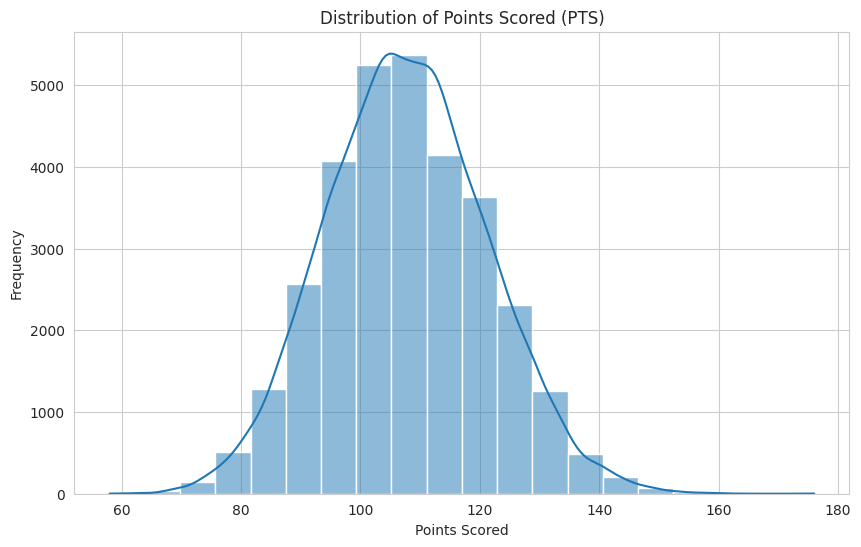

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram for 'PTS' (Points Scored)
plt.figure(figsize=(10, 6))
sns.histplot(df['PTS'], bins=20, kde=True)
plt.title('Distribution of Points Scored (PTS)')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.show()

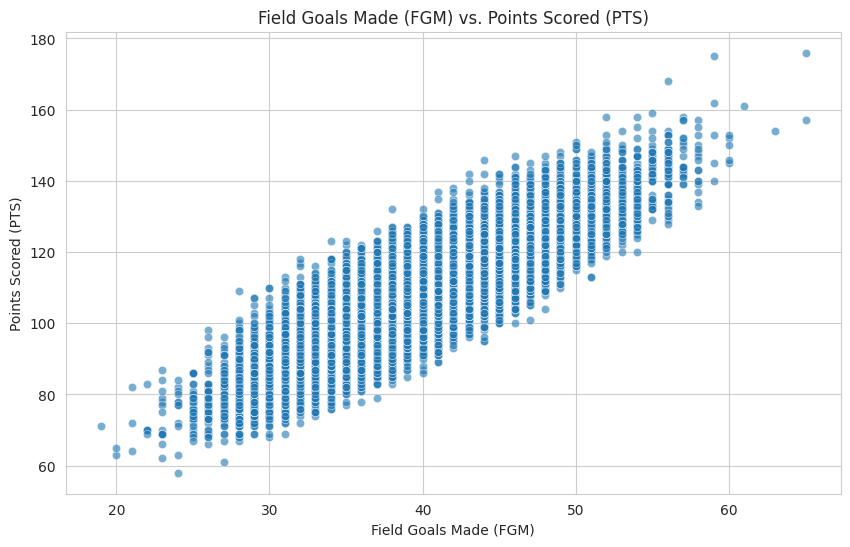

In [14]:
# Create a scatter plot of 'FGM' (Field Goals Made) vs 'PTS' (Points Scored)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FGM', y='PTS', data=df, alpha=0.6)
plt.title('Field Goals Made (FGM) vs. Points Scored (PTS)')
plt.xlabel('Field Goals Made (FGM)')
plt.ylabel('Points Scored (PTS)')
plt.show()